In [1]:
from PIL import Image
import colorsys
import subprocess 
import os
import sys
import matplotlib.pyplot as plt
import numpy as np



In [4]:
image_path = "../datos_entrada/ej1/"
metodos = ["DisjointSet - Arreglo", "DisjointSet - Árbol","DisjointSet - Árbol optimizado"]
def crear_colores(N=5):
    HSV_tuples = [(x * 1.0 / N, 0.9, 0.9) for x in range(N)]
    res = []
    for rgb in HSV_tuples:
        rgb = map(lambda x: int(x * 255), colorsys.hsv_to_rgb(*rgb))
        res.append(tuple(rgb))
    return res 

def preparar_img(name):
    img = Image.open(os.path.join(image_path,name)).convert("L")
    width, height = img.size
    data = ""
    imgdata = list(img.getdata())
    for i in range(0,height):        
        indexes = range(i*width,i*width+width)
        data = data + " ".join([str(imgdata[x]) for x in indexes]) + "\n"
    input_text = f"{height} {width}\n{data}"
    f = open("{0}.txt".format(name), "w")
    f.write(input_text)
    f.close()
    return (height, width, input_text, img)

def armar_imagen(n, m ,data):
    split_data = [int(j) for i in data.splitlines() for j in i.split(" ") if j != '']
    uniques = set(split_data)

    colores = crear_colores(len(uniques))
    color_dict = dict(zip(uniques, colores))

    img = Image.new("RGB", (m, n))
    for i in range(0, n):
        for j in range(0, m):
            img.putpixel((j, i), color_dict[split_data[i*m + j]])
    return img

def correr(image_name, k, metodo):
    datos_img = preparar_img(image_name)
    completado = subprocess.run(["../../Resolucion/bin/ej1", f"{metodo}", f"{k}", f"{image_name}"], stdout=subprocess.PIPE, input=datos_img[2], universal_newlines=True)
    if completado.returncode != 0:
        print(f"ERROR: El programa finalizo de forma incorrecta. Parametros usados: k={k} metodo={metodo}")
    else:
        img_generada = armar_imagen(datos_img[0], datos_img[1], str(completado.stdout))

        img_original = datos_img[3].convert("RGB")
        max_height = max(img_generada.height, img_original.height)
        total_width = img_generada.width + img_original.width

        comp_img = Image.new("RGB", (total_width, max_height))
        comp_img.paste(img_original, (0, 0))
        comp_img.paste(img_generada, (img_generada.width, 0))
        im_array = np.asarray(comp_img)
        plt.title('{0} | K = {1} | Método: {2}'.format(image_name,k,metodos[metodo]), fontsize=16)
        plt.imshow(im_array)
        plt.show()



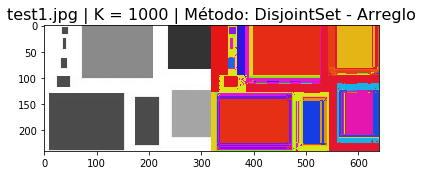

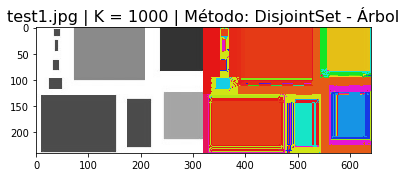

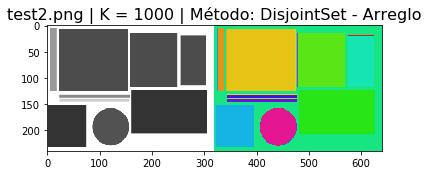

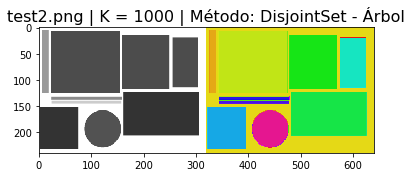

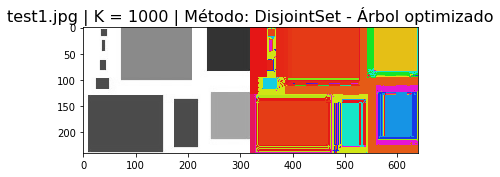

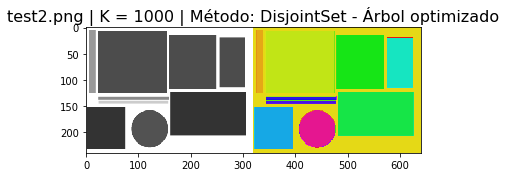

In [5]:
correr("test1.jpg", 1000, 0)
correr("test1.jpg", 1000, 1)
correr("test2.png", 1000, 0)
correr("test2.png", 1000, 1)
correr("test1.jpg", 1000, 2)
correr("test2.png", 1000, 2)
